In [2]:
import pandas as pd

In [3]:
import numpy as np 
from sklearn.preprocessing import StandardScaler 
#from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
data=pd.read_csv('/config/workspace/DATASET/diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

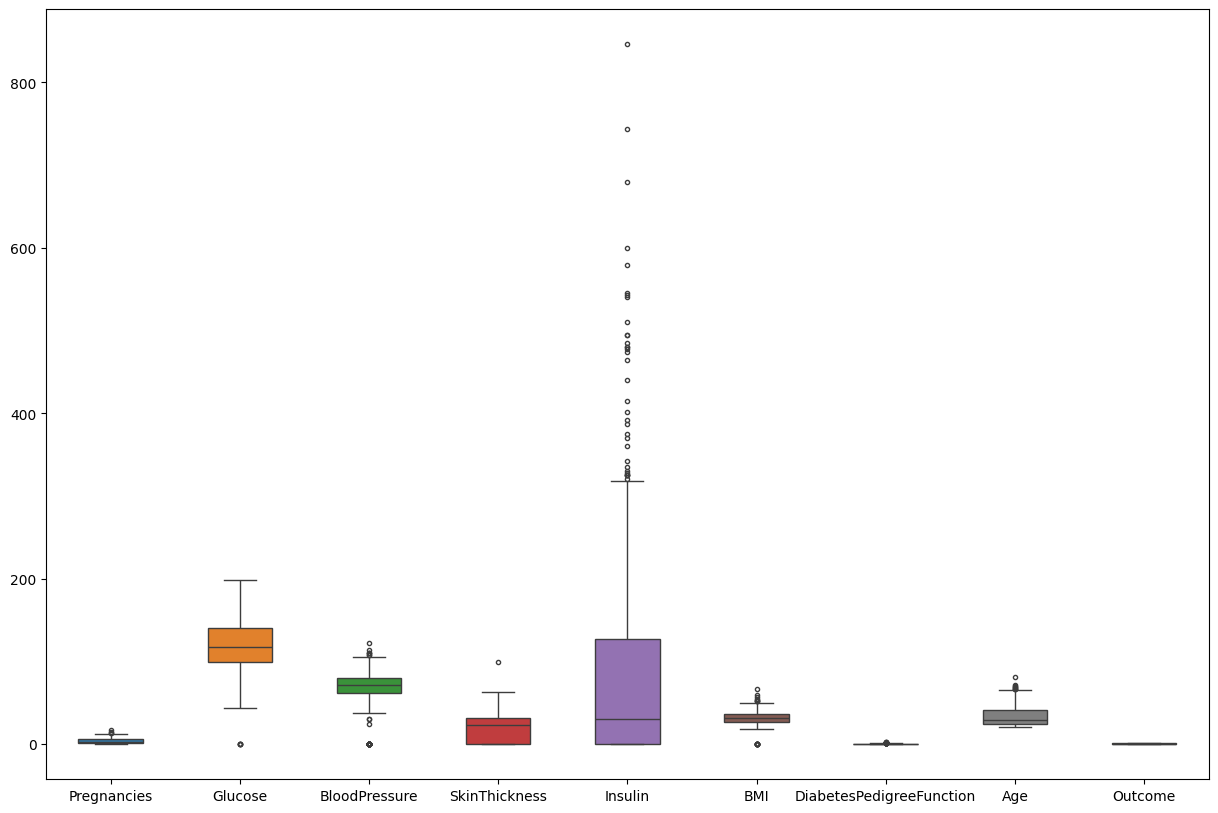

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [9]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

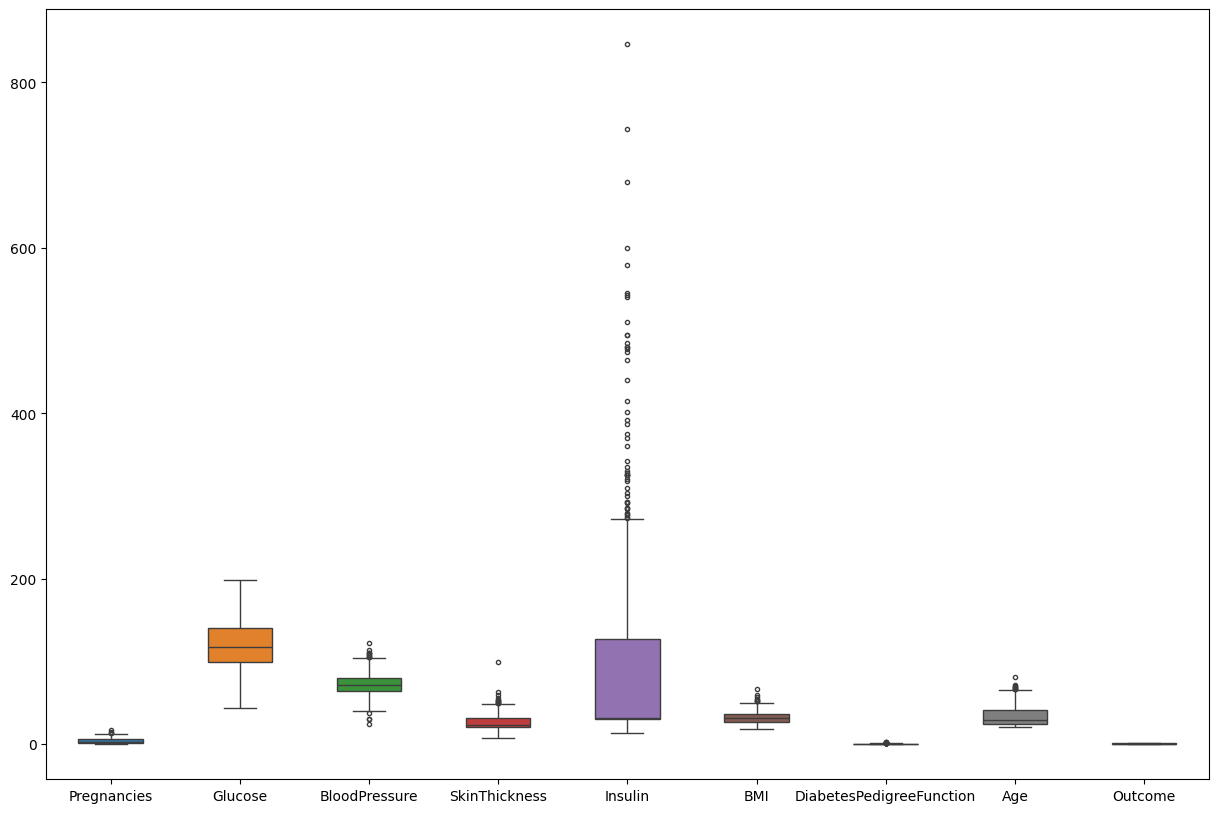

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [12]:
X= data.drop(columns=['Outcome'])
y=data['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape



((576, 8), (192, 8))

In [14]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
import pickle
file=open('/config/workspace/MODEL/standardScalar.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
gnb=GaussianNB()

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [20]:
clf=GridSearchCV(gnb,param_grid=params_NB ,cv=3,scoring='accuracy',verbose=3)

In [21]:
clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END .................var_smoothing=1.0;, score=0.719 total time=   0.0s
[CV 2/3] END .................var_smoothing=1.0;, score=0.797 total time=   0.0s
[CV 3/3] END .................var_smoothing=1.0;, score=0.698 total time=   0.0s
[CV 1/3] END ..var_smoothing=0.8111308307896871;, score=0.729 total time=   0.0s
[CV 2/3] END ..var_smoothing=0.8111308307896871;, score=0.781 total time=   0.0s
[CV 3/3] END ..var_smoothing=0.8111308307896871;, score=0.698 total time=   0.0s
[CV 1/3] END ...var_smoothing=0.657933224657568;, score=0.734 total time=   0.0s
[CV 2/3] END ...var_smoothing=0.657933224657568;, score=0.781 total time=   0.0s
[CV 3/3] END ...var_smoothing=0.657933224657568;, score=0.708 total time=   0.0s
[CV 1/3] END ...var_smoothing=0.533669923120631;, score=0.719 total time=   0.0s
[CV 2/3] END ...var_smoothing=0.533669923120631;, score=0.781 total time=   0.0s
[CV 3/3] END ...var_smoothing=0.53366992312063

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=3)

In [22]:
clf.best_params_

{'var_smoothing': 0.657933224657568}

In [24]:
gnb_1=GaussianNB(var_smoothing=0.657933224657568)
gnb_1.fit(X_train_scaled,y_train)

GaussianNB(var_smoothing=0.657933224657568)

In [25]:
y_pred=gnb_1.predict(X_test_scaled)

In [26]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[121,   9],
       [ 36,  26]])

In [27]:
acc=accuracy_score(y_test,y_pred)

In [28]:
acc

0.765625

In [ ]:
file=open('/config/workspace/MODEL/Gauss.pkl','wb')
pickle.dump(gnb_1,file)
file.close()

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install -U scikit-learn scipy matplotlib